In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import h5py


D:\Anaconda3\envs\pytorch\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

from torch.utils.data import TensorDataset, DataLoader

In [3]:
import sys
# Import FBP
sys.path.append('../FBPConvNet/')
from FBPConvNet import Generator, Discriminator

sys.path.append('../')
from net_utils import get_datetime,train_net, train_GANs, displaySample, EllipseDataset, EllipseTransformPair

In [4]:
from pix2pixModels import NLayerDiscriminator, UnetGenerator

# Generate Example Data

In [97]:
from torch.utils.data import Dataset, DataLoader
import random

In [5]:
def preprocess(data):
    return torch.Tensor(data).unsqueeze(1)
def target_ones(N,GPU=False):
    if GPU:
        return torch.ones(N,1).cuda()
    else:
        return torch.ones(N,1)

def target_noisy_ones(N,GPU=False):
    # maps between .7 and 1.2
    labels = torch.rand((N,1))*.5+.7
    if GPU:
        return labels.cuda()
    return labels
    
def target_zeros(N,GPU=False):
    if GPU:
        return torch.zeros(N,1).cuda()
    else:
        return torch.zeros(N,1)   

def target_noisy_zeros(N,GPU=False):
    # maps between .7 and 1.2
    labels = torch.rand((N,1))*.3
    if GPU:
        return labels.cuda()
    return labels

In [4]:
pathtodata = '../data/RandomLineEllipses15.hdf5'

f = h5py.File(pathtodata,'r')
temp = EllipseDataset(f['ellip/test_data'],f['ellip/test_labels'],transform=EllipseTransformPair())
f.close()

In [6]:
trainloader = DataLoader(temp,batch_size=2,shuffle=True)


In [7]:
trainiter = iter(trainloader)

In [10]:
batch = trainiter.next()
batch[0]


( 0 , 0 ,.,.) = 
  0.0093 -0.0228  0.0093  ...  -0.0344 -0.0403 -0.0811
  0.0152 -0.0111 -0.0140  ...  -0.0461 -0.0403 -0.0344
  0.0006 -0.0023 -0.0228  ...  -0.0403 -0.0344 -0.0198
           ...             ⋱             ...          
 -0.0140  0.0064  0.0093  ...   0.0560  0.0152  0.0327
 -0.0140  0.0297  0.0297  ...   0.0589  0.0181  0.0268
  0.0677  0.0793  0.0647  ...   0.0443  0.0443  0.0210
      ⋮  

( 1 , 0 ,.,.) = 
  0.0165 -0.0086 -0.0337  ...  -0.0212 -0.0002  0.0207
 -0.0044  0.0333  0.0542  ...   0.0123  0.0165  0.0333
  0.0375  0.0040 -0.0170  ...   0.0291  0.0333  0.0249
           ...             ⋱             ...          
 -0.0002 -0.0086  0.0249  ...  -0.0086 -0.0589 -0.0337
  0.0165 -0.0002  0.0123  ...  -0.0337 -0.0631 -0.0254
  0.0040  0.0165  0.0165  ...  -0.0212 -0.0044  0.0207
[torch.FloatTensor of size 2x1x256x256]

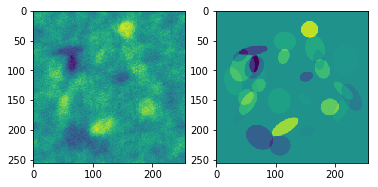

In [28]:
i = np.random.randint(0,100)
img,label = temp[i]
plt.figure()
plt.subplot(121)
plt.imshow(img[0].numpy())
plt.subplot(122)
plt.imshow(label[0].numpy())

In [7]:
# set path to data
pathtodata = '../data/RandomLineEllipses15.hdf5'
dataset_size = 200
batch_size = 2

In [ ]:
# f = h5py.File(pathtodata,'r')
# print([ key for key in f['ellip']])
# fakeinput = preprocess(f['ellip/training_data'][0:dataset_size])
# fakelabels = preprocess(f['ellip/training_labels'][0:dataset_size])
# reallabels = preprocess(f['ellip/training_labels'][dataset_size:2*dataset_size])

# testinput = preprocess(f['ellip/test_data'])
# testlabels = preprocess(f['ellip/test_labels'])
# f.close()

In [7]:
f = h5py.File(pathtodata,'r')
print([ key for key in f['ellip']])

fakeinput1 = f['ellip/training_data'][0:dataset_size]
fakeinput2 = fakeinput1.copy()[:,:,::-1]
fakeinput = preprocess(np.concatenate((fakeinput1,fakeinput2)))

fakelabels1 = f['ellip/training_labels'][0:dataset_size]
fakelabels2 = fakelabels1.copy()[:,:,::-1]
fakelabels = preprocess(np.concatenate((fakelabels1,fakelabels2)))

reallabels1 = f['ellip/training_labels'][dataset_size:2*dataset_size]
reallabels2 = reallabels1.copy()[:,:,::-1]
reallabels = preprocess(np.concatenate((reallabels1,reallabels2)))

del fakeinput1, fakeinput2, fakelabels1, fakelabels2, reallabels1, reallabels2

testinput = preprocess(f['ellip/test_data'])
testlabels = preprocess(f['ellip/test_labels'])
f.close()

['test_data', 'test_labels', 'training_data', 'training_labels']


In [15]:
f = h5py.File(pathtodata,'r')
print([ key for key in f['ellip']])

fakeinput1 = f['ellip/training_data'][0:]
fakeinput2 = fakeinput1.copy()[:,:,::-1]
fakeinput = preprocess(np.concatenate((fakeinput1,fakeinput2)))

fakelabels1 = f['ellip/training_labels'][0:]
fakelabels2 = fakelabels1.copy()[:,:,::-1]
fakelabels = preprocess(np.concatenate((fakelabels1,fakelabels2)))


del fakeinput1, fakeinput2, fakelabels1, fakelabels2, 

testinput = preprocess(f['ellip/test_data'])
testlabels = preprocess(f['ellip/test_labels'])
f.close()

['test_data', 'test_labels', 'training_data', 'training_labels']


In [16]:
faketrainset = TensorDataset(fakeinput,fakelabels)
testset = TensorDataset(testinput,testlabels)

faketrainloader = DataLoader(faketrainset,batch_size=batch_size,shuffle=True)
#realtrainloader = DataLoader(reallabels, batch_size=batch_size,shuffle=True)
testloader = DataLoader(testset,batch_size=1,shuffle=False)

In [ ]:
len(faketrainloader)
# realiter = iter(realtrainloader)
# for i in range(len(realtrainloader)):
#     data = realiter.next()
#     print(data.size())

In [35]:
class DiscriminativeNet(torch.nn.Module):
    
    def __init__(self):
        super(DiscriminativeNet, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1, out_channels=128, kernel_size=4, 
                stride=2, padding=1, bias=False
            ),
            nn.LeakyReLU(0.2, inplace=True)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=128, out_channels=256, kernel_size=4,
                stride=2, padding=1, bias=False
            ),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=256, out_channels=512, kernel_size=4,
                stride=2, padding=1, bias=False
            ),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels=512, out_channels=1024, kernel_size=4,
                stride=2, padding=1, bias=False
            ),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.2, inplace=True)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(
                in_channels=1024, out_channels=1024, kernel_size=4,
                stride=2, padding=1, bias=False
            ),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.2, inplace=True)
        )
        self.out = nn.Sequential(
            nn.Linear(1024*8*8, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        # Convolutional layers
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        # Flatten and apply sigmoid
        x = x.view(-1, 1024*8*8)
        x = self.out(x)
        return x

# Training Pseudocode

In [17]:
import time
import os

In [ ]:
# def train_GANs(G, D, faketrainloader, realtrainloader, num_epochs=500, GPU=False,
#               weightpath='./weights/',save_epoch=50,saveweights=True):
#     # Create output directory
#     weightpath = os.path.join(weightpath,get_datetime())
#     os.makedirs(weightpath)
#     logpath = os.path.join(weightpath,'log.txt')
    
#     with open(logpath, "wt") as text_file:
#         print('Epoch\tD Loss\tG Loss\tEpoch Time\tTotal Time',file=text_file)

#     num_data = len(realtrainloader)*realtrainloader.batch_size 
#     d_losses = np.zeros(num_epochs)
#     g_losses = np.zeros(num_epochs)

#     # Accumulate log text
#     logtxt = ''
    
#     # Determine minibatch size
#     minibatch = max(1,int(len(realtrainloader))/10)
    
#     # Define Loss Function/Optimizer
#     bceloss = nn.BCELoss()
#     mseloss = nn.MSELoss()

#     d_optimizer = optim.Adam(D.parameters(), lr=0.0002)
#     g_optimizer = optim.Adam(G.parameters(), lr=0.0002)

    
#     G.train()
#     trainstart = time.time()
#     for epoch in range(num_epochs):
#         # Collect loss information
#         d_epoch_loss = 0.0
#         g_epoch_loss = 0.0
#         d_running_loss = 0.0
#         g_running_loss = 0.0
        
#         epochstart = time.time()

#         fakeiter = iter(faketrainloader)
#         realiter = iter(realtrainloader)
#         Giter = iter(faketrainloader)
#         for batch_index in range(len(realtrainloader)):
#             ## prepare data
#             truelabels = realiter.next()
#             fakeinput, _ = fakeiter.next()
#             batch_size = truelabels.size(0)


#             if GPU:
#                 truelabels = truelabels.cuda()
#                 fakeinput = fakeinput.cuda()
#     #             fakelabel = fakelabel.cuda()
#             d_real_data = Variable(truelabels)
#             d_gen_input = Variable(fakeinput)
#             d_fake_data = G(d_gen_input).detach() # detach to avoid training G on these labels
            
#             ## Train D
#             d_optimizer.zero_grad()

#             # Train D on real
#             d_real_decision = D(d_real_data)
#             d_real_error = bceloss(d_real_decision, Variable(target_noisy_ones(batch_size,GPU)))
#             d_real_error.backward()

#             # Train D on fake

#             d_fake_decision = D(d_fake_data)
#             d_fake_error = bceloss(d_fake_decision, Variable(target_noisy_zeros(batch_size,GPU))) 
#             d_fake_error.backward()
#             d_optimizer.step()
#             d_loss = d_real_error+d_fake_error
            
#             d_running_loss += d_loss.data[0]
#             d_losses[epoch] += d_loss.data[0]
            
        
#             ## Train G
#             g_fake_input, g_fake_label = Giter.next()
#             batch_size = g_fake_input.size(0)

#             if GPU:
#                 g_fake_input = g_fake_input.cuda()
#                 g_fake_label = g_fake_label.cuda()

#             gen_input = Variable(g_fake_input)
#             g_fake_data = G(gen_input)
  
#             g_optimizer.zero_grad()

#             dg_fake_decision = D(g_fake_data)
#             g_loss = (10**-2)*bceloss(dg_fake_decision, Variable(target_noisy_ones(batch_size,GPU)))
#             g_loss +=  mseloss(g_fake_data,Variable(g_fake_label))

#             g_loss.backward()
#             g_optimizer.step()
            
#             g_running_loss += g_loss.data[0]
#             g_losses[epoch] += g_loss.data[0]
            
#             # print statistics
#             if (batch_index+1) % minibatch == 0:
#                 print('\t[%d, %5d] D loss: %.3f, G loss: %.3f, %.3f seconds elapsed' %
#                       (epoch + 1, batch_index + 1, d_running_loss / minibatch, 
#                        g_running_loss/minibatch, time.time() - epochstart))
#                 d_running_loss = 0.0
#                 g_running_loss = 0.0
#         # Record epoch statistics
#         epochend = time.time()        
#         print('Epoch %d Training Time: %.3f seconds\nTotal Elapsed Time: %.3f seconds' %
#                (epoch+1, epochend-epochstart,epochend-trainstart))
        
#         # log losses
#         d_losses[epoch] /= num_data
#         g_losses[epoch] /= num_data
#         logtxt += '%i\t%f\t%f\t%f\t%f\n' % (epoch+1,d_losses[epoch], g_losses[epoch],
#                                            epochend-epochstart,epochend-trainstart)

        
#         # Save weights
#         if (epoch % save_epoch == 0 or epoch == num_epochs-1):
#             if saveweights:
#                 d_outpath = os.path.join(weightpath,'D_epoch_'+str(epoch+1)+'.weights')
#                 g_outpath = os.path.join(weightpath,'G_epoch_'+str(epoch+1)+'.weights')
#                 D = D.cpu()
#                 G = G.cpu()
#                 torch.save(D.state_dict(),d_outpath)
#                 torch.save(G.state_dict(),g_outpath)

#                 if GPU:
#                     D = D.cuda()
#                     G = G.cuda()
            
#             # write loss to logfile
#             with open(logpath, "at") as text_file:
#                 print(logtxt[:-2],file=text_file)
#                 logtxt = ''

#     print('Finished Training')
#     return d_losses,g_losses


In [10]:
D = Discriminator2()
G = Generator()

In [ ]:
#weightspath = '../FBPConvNet/weights/2018-05-07_14-50-41/epoch_500.weights'
# weightspath = './weights/2018-06-04_18-34-00/G_epoch_126.weights'

# checkpoint = torch.load(weightspath)
# G.load_state_dict(checkpoint)

In [18]:
G = UnetGenerator(input_nc=1, output_nc=1, num_downs=8, ngf=64, norm_layer=nn.BatchNorm2d, use_dropout=True)

In [ ]:
torch.cuda.empty_cache()
num_epochs = 250

GPU = True
if GPU:
    #D = D.cuda()
    G = G.cuda()
#d_losses, g_losses = train_GANs(G,D,faketrainloader,realtrainloader,num_epochs=num_epochs,save_epoch=10,GPU=GPU)
train_net(G,faketrainloader,num_epochs=num_epochs,GPU=GPU,save_epoch=25,saveweights=True)

	[1,    40] loss: 0.001, 11.896 seconds elapsed
	[1,    80] loss: 0.001, 23.726 seconds elapsed
	[1,   120] loss: 0.002, 35.625 seconds elapsed
	[1,   160] loss: 0.002, 47.454 seconds elapsed
	[1,   200] loss: 0.002, 59.287 seconds elapsed
	[1,   240] loss: 0.002, 71.135 seconds elapsed
	[1,   280] loss: 0.002, 82.967 seconds elapsed
	[1,   320] loss: 0.002, 94.810 seconds elapsed
	[1,   360] loss: 0.002, 106.650 seconds elapsed
	[1,   400] loss: 0.002, 118.491 seconds elapsed
Epoch 1 Training Time: 118.492 seconds
Total Elapsed Time: 118.492 seconds
	[2,    40] loss: 0.002, 11.844 seconds elapsed
	[2,    80] loss: 0.001, 23.738 seconds elapsed
	[2,   120] loss: 0.002, 35.544 seconds elapsed
	[2,   160] loss: 0.002, 47.348 seconds elapsed
	[2,   200] loss: 0.001, 59.162 seconds elapsed
	[2,   240] loss: 0.001, 70.967 seconds elapsed
	[2,   280] loss: 0.001, 82.775 seconds elapsed
	[2,   320] loss: 0.002, 94.581 seconds elapsed
	[2,   360] loss: 0.001, 106.408 seconds elapsed
	[2,   400

	[15,   320] loss: 0.001, 94.473 seconds elapsed
	[15,   360] loss: 0.001, 106.291 seconds elapsed
	[15,   400] loss: 0.001, 118.112 seconds elapsed
Epoch 15 Training Time: 118.113 seconds
Total Elapsed Time: 1773.620 seconds
	[16,    40] loss: 0.001, 11.801 seconds elapsed
	[16,    80] loss: 0.001, 23.617 seconds elapsed
	[16,   120] loss: 0.001, 35.437 seconds elapsed
	[16,   160] loss: 0.001, 47.251 seconds elapsed
	[16,   200] loss: 0.001, 59.068 seconds elapsed
	[16,   240] loss: 0.001, 70.869 seconds elapsed
	[16,   280] loss: 0.001, 82.699 seconds elapsed
	[16,   320] loss: 0.001, 94.520 seconds elapsed
	[16,   360] loss: 0.001, 106.338 seconds elapsed
	[16,   400] loss: 0.001, 118.153 seconds elapsed
Epoch 16 Training Time: 118.154 seconds
Total Elapsed Time: 1891.775 seconds
	[17,    40] loss: 0.001, 11.817 seconds elapsed
	[17,    80] loss: 0.001, 23.637 seconds elapsed
	[17,   120] loss: 0.001, 35.456 seconds elapsed
	[17,   160] loss: 0.001, 47.267 seconds elapsed
	[17,   2

	[30,    80] loss: 0.001, 23.600 seconds elapsed
	[30,   120] loss: 0.001, 35.423 seconds elapsed
	[30,   160] loss: 0.001, 47.235 seconds elapsed
	[30,   200] loss: 0.001, 59.045 seconds elapsed
	[30,   240] loss: 0.001, 70.845 seconds elapsed
	[30,   280] loss: 0.001, 82.638 seconds elapsed
	[30,   320] loss: 0.001, 94.446 seconds elapsed
	[30,   360] loss: 0.001, 106.269 seconds elapsed
	[30,   400] loss: 0.001, 118.077 seconds elapsed
Epoch 30 Training Time: 118.077 seconds
Total Elapsed Time: 3546.549 seconds
	[31,    40] loss: 0.001, 11.799 seconds elapsed
	[31,    80] loss: 0.001, 23.603 seconds elapsed
	[31,   120] loss: 0.001, 35.395 seconds elapsed
	[31,   160] loss: 0.001, 47.201 seconds elapsed
	[31,   200] loss: 0.001, 59.005 seconds elapsed
	[31,   240] loss: 0.001, 70.802 seconds elapsed
	[31,   280] loss: 0.001, 82.603 seconds elapsed
	[31,   320] loss: 0.001, 94.399 seconds elapsed
	[31,   360] loss: 0.001, 106.192 seconds elapsed
	[31,   400] loss: 0.001, 117.992 seco

In [ ]:
d_losses = np.loadtxt('./experiments/FeedForward/log.txt',skiprows=1,usecols=(1), delimiter='\t' ,dtype=float)

In [ ]:
start = 0
end = 500
plt.figure()
# plt.subplot(121)
plt.plot(np.arange(start,end),d_losses[start:end])
plt.title('Discriminator Losses')
# plt.subplot(122)
# plt.plot(np.arange(start,end),g_losses[start:end])
# plt.title('Generator Losses')

In [ ]:
weightspath = './weights/2018-06-04_18-34-00/G_epoch_126.weights'
checkpoint = torch.load(weightspath)
G.load_state_dict(checkpoint)

In [20]:
testiter = iter(testloader)

(-0.5, 255.5, 255.5, -0.5)

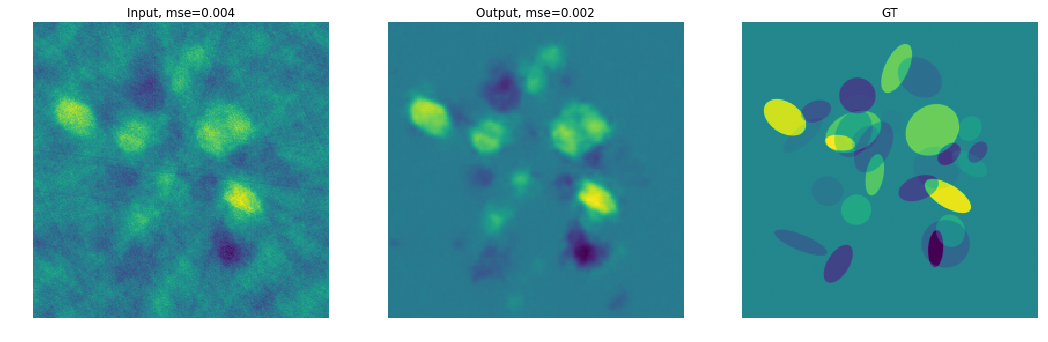

In [24]:
y,x = testiter.next()
G.eval()
GPU = True
if GPU:
    xhat = G(Variable(y.cuda(),volatile=True))
    xhat = xhat.cpu().data
else:
    xhat = G(Variable(y)).data
plt.figure(figsize=(18,6))
plt.subplot(131)
mse =torch.mean((y[0,0,:,:]-x[0,0,:,:])**2)
plt.imshow(y[0,0,...].numpy())
plt.title('Input, mse=%.3f'%(mse))
plt.axis('off')

mse =torch.mean((xhat[0,0,:,:]-x[0,0,:,:])**2)
plt.subplot(132)
plt.imshow(xhat[0,0,...].numpy())
plt.title('Output, mse=%.3f'%(mse))
plt.axis('off')

plt.subplot(133)
plt.imshow(x[0,0,...].numpy())
plt.title('GT')
plt.axis('off')

In [ ]:
def test_mse(G, testloader):
    # Calculate Test MSE
    test_mses = np.zeros(len(testloader))
    for i,data in enumerate(testloader):
        y,x = data 
        GPU = True
        if GPU:
            xhat = G(Variable(y.cuda(),volatile=True))
            xhat = xhat.cpu().data
        else:
            xhat = G(Variable(y,volatile=True)).data

        test_mses[i] = torch.mean((xhat[:,0,:,:]-x[:,0,:,:])**2)
    return test_mses.mean()

In [ ]:
mse = test_mse(G,testloader)
print('Test MSE = %f'%(mse))

In [ ]:
len(range(0,500,25)), len(trained_nets)

In [ ]:
mses = np.zeros(21)
basepath = './weights/2018-06-04_18-34-00/G_epoch_'

for i,epoch in enumerate(range(0,500,25)):
    weightspath = basepath + str(epoch+1) + '.weights'
    checkpoint = torch.load(weightspath)
    G.load_state_dict(checkpoint)
    G = G.cuda()
    mses[i] = test_mse(G,testloader)
weightspath = basepath + str(500) + '.weights'
checkpoint = torch.load(weightspath)
G.load_state_dict(checkpoint)
G = G.cuda()
mses[-1] = test_mse(G,testloader)

In [ ]:
plt.plot(np.arange(1,502,25),mses)

In [ ]:
print(mses[-1], mses.min())

In [ ]:
test_mses = np.zeros(len(testloader))

for i,data in enumerate(testloader):
    y,x = data 

    test_mses[i] = torch.mean((y[:,0,:,:]-x[:,0,:,:])**2)
print(test_mses.mean())

In [ ]:
G = G.cpu()
torch.save(G.state_dict(),'Gmse_100.weights')
D = D.cpu()
torch.save(D.state_dict(),'Dmse_100.weights')

if GPU:
    G = G.cuda()
    D = D.cuda()
